Optimization terminated successfully.
         Current function value: 0.397900
         Iterations: 48
         Function evaluations: 132


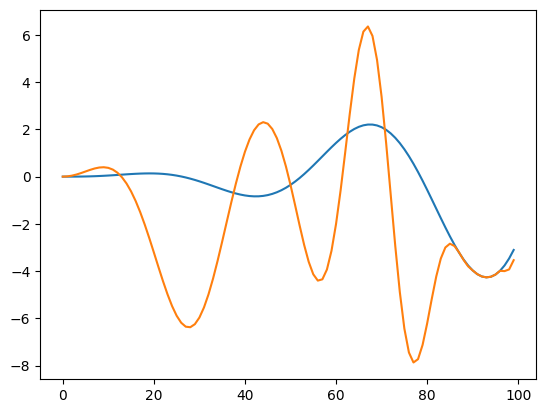

In [75]:
# Example Python workbook which uses the executable compiled in cpp_code
# sampleFunction takes as input a vector containing a point to be queried
# It checks all possible errors from the executable, and if all
# is looking good it returns the output of the function.
# As an example, this is used as a function to be optimised by 
# the minimize function
import subprocess
import sys
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Define the interface with the solver
def sampleFunction(point):
    pointString = "["
    for i in range(len(point) - 1):
        pointString = pointString + str(point[i]) + ","
    pointString = pointString + str(point[-1]) + "]"
    output = subprocess.check_output(["cpp_code\main", functionName, str(fidelity), pointString])
    if output[:38] == b"Problem: Could not match function name":
        print("Incorrect function name!")
        sys.exit(0)
    if output[:30] == b"Provided point has a dimension":
        print("Incorrect point dimension!")
        print(output)
        sys.exit(0)
    if output[:25] == b"Unkown fidelity specified":
        print(output)
        sys.exit(0)
    if output[:32] == b"Provided point is out of bounds!":
        print(output)
        print("Returning inf")
        return float('inf')
    # If here it all worked
    return float(output)


# For all available function names, consult the folder availableFunctions,
# or look at the repo here https://github.com/nandresthio/bifiEBBbenchmarks
functionName = "ToalBranin0.50"
# Change this to 1 for high-fidelity output, and to 0 for low-fidelity output
fidelity = 1
# Example optimising the Branin function
minimize(sampleFunction, np.array([5, 5]), method='nelder-mead',
               options={'xatol': 1e-8, 'disp': True})  


# Example plot of a newly defined disturbance based function. 
# In this case the function has domain [0,1]
functionName = "DisturbanceBasedFunction1-seed1-disth2-height0-radius0.05-freq2-amp2"
vals = []
valsLow = []
n = 100
fidelity = 0
for i in range(n):
    fidelity = 1
    vals.append(sampleFunction([i/n]))
    fidelity = 0
    valsLow.append(sampleFunction([i/n]))
    
plt.plot(range(n), vals) 
plt.plot(range(n), valsLow) 
plt.show()
